# Vorbereitung

In [6]:
import tensorflow.keras as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

# Vortrainiertes Netz laden

In [7]:
model = InceptionV3(weights='imagenet')
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

# Bild vorbereiten

In [13]:
img_file = 'IMG_3519.JPG'
img = image.load_img(img_file, target_size=(299, 299))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(x.shape)
print(x)

(1, 299, 299, 3)
[[[[-0.7411765  -0.7490196  -0.78039217]
   [-0.70980394 -0.73333335 -0.7882353 ]
   [-0.64705884 -0.67058825 -0.7882353 ]
   ...
   [-0.04313725 -0.01960784 -0.10588235]
   [ 0.12941182  0.17647064 -0.18431371]
   [ 0.3411765   0.3411765  -0.23921567]]

  [[-0.69411767 -0.6862745  -0.7490196 ]
   [-0.7254902  -0.73333335 -0.77254903]
   [-0.6392157  -0.654902   -0.7490196 ]
   ...
   [-0.06666666  0.0196079  -0.04313725]
   [-0.02745098 -0.01176471 -0.03529412]
   [ 0.07450986  0.07450986 -0.12941176]]

  [[-0.6392157  -0.62352943 -0.70980394]
   [-0.7490196  -0.7411765  -0.7882353 ]
   [-0.64705884 -0.6392157  -0.7647059 ]
   ...
   [-0.1372549   0.00392163 -0.09019607]
   [-0.09019607 -0.0745098  -0.08235294]
   [-0.1372549  -0.12941176 -0.17647058]]

  ...

  [[-0.69411767 -0.67058825 -0.5529412 ]
   [-0.7254902  -0.70980394 -0.60784316]
   [-0.6862745  -0.6862745  -0.62352943]
   ...
   [-0.8980392  -0.8980392  -0.88235295]
   [-0.9137255  -0.9137255  -0.9137255 ]

# Die Ergebnisse

In [14]:
prediction = model.predict(x)
decoded = decode_predictions(prediction, top=3)[0]
print(decoded)

[('n12998815', 'agaric', 0.8951071), ('n07734744', 'mushroom', 0.05808453), ('n13054560', 'bolete', 0.0016886676)]


# Anzeigen

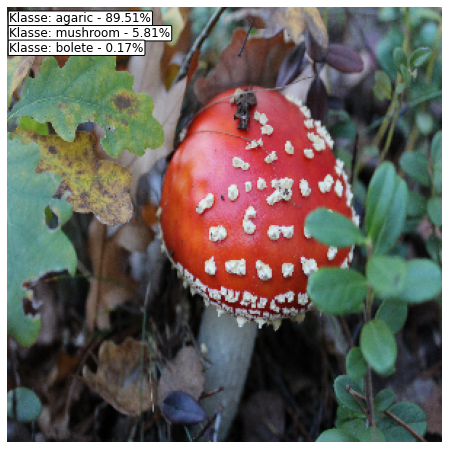

In [15]:
plt.figure(figsize=(8, 8))
plt.axis('off')

pos_x, pos_y = 1, 10
for id, lab, prob in decoded:
  plt.text(pos_x, pos_y, 'Klasse: {} - {:.2f}%'.format(lab, prob * 100),
           fontsize=12, color='black',
           bbox=dict(boxstyle='round', pad=0.1, fc='white'))
  pos_y +=10

plt.imshow(img)